In [53]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn import model_selection

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
def compareAlgorithms(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [56]:
def compareCostSensitiveAlgorithms(X_train, y_train, weights):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(class_weight=weights)))
    models.append(('SVM', SVC(class_weight=weights)))
    models.append(('Linear SVC', LinearSVC(class_weight=weights)))
    models.append(('DT', DecisionTreeClassifier(class_weight=weights)))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [57]:
def compareAlgorithmsRUS(X_train, y_train):
    from imblearn.under_sampling import RandomUnderSampler


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, f05_results,names

In [58]:
def compareAlgorithmsSMOTE(X_train, y_train):
    from imblearn.over_sampling import SMOTE


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    #print("F05 Results:",f05_results)
    
    return precision_results, recall_results,f05_results, names

In [107]:
def barChart(results, score, name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots()
    algorithms = ['LR', 'SVM', 'Linear SVM', 'DT']
    ax.bar(algorithms,results)
    ax.set_ylabel(score)
    ax.set_title(score)
    
    plt.ylim(0,1)

    # annotate bars
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)
    
    plt.show()

In [60]:
def twoGroupsBarChart(results1, string1, results2, string2, score, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, results1, width, label=string1)
    rects2 = ax.bar(x + width/2, results2, width, label=string2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)
    
    
    plt.show()

In [100]:
def threeGroupsBarChart(results1, string1, results2, string2, results3, string3, score, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'DT']

    y = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(y - width, results1, width, label=string1)
    rects2 = ax.barh(y, results2, width, label=string2)
    rects3 = ax.barh(y + width, results3, width, label=string3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_yticks(y, labels=labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    #ax.set_ylabel(labels)
    ax.set_title(score)
    ax.set_xlabel(score)
    #ax.set_xticklabels(labels)
    #ax.legend()
    
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.legend()
    
    plt.xlim(0,1)
    
    
    # label bars
    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=10)
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=10)
    ax.bar_label(rects3, padding=3, fmt='%.2f', label_type='edge', fontsize=10)

    fig.tight_layout()
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName, bbox_inches='tight')
    
    plt.show()

In [62]:
# Function to create a confusion matrix 
def conf_matrix(y_test, y_pred):    
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

# Cost insensitve learning results

In [65]:
# make feature matrix and target matrix
X = pd.read_csv('BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibGDMDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [66]:
precision, recall, f05, names = compareAlgorithms(X_train, y_train)

cost_insensitive_precision.png


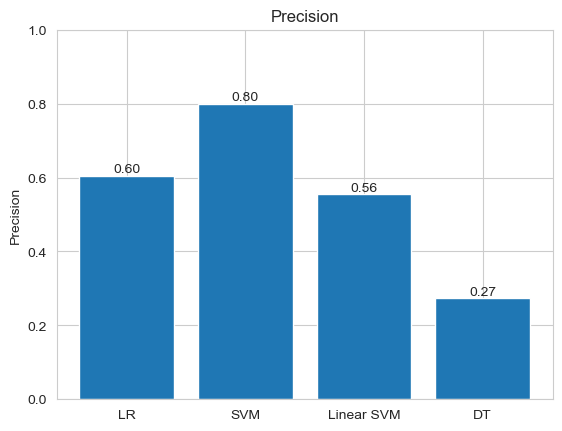

cost_insensitive_recall.png


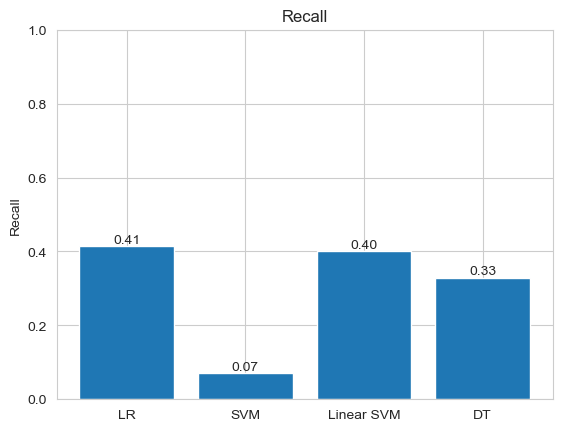

cost_insensitive_f05.png


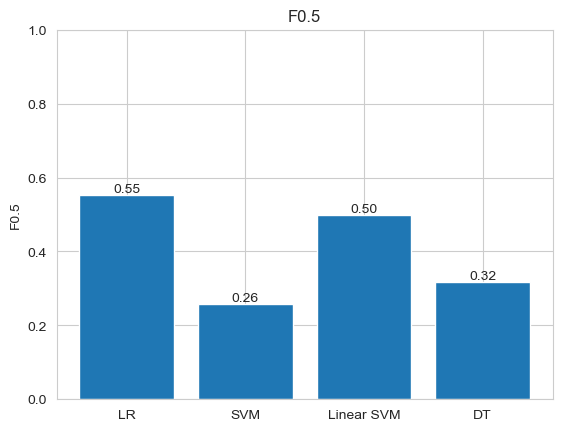

In [108]:
barChart(precision, "Precision", "cost_insensitive_precision")
barChart(recall, "Recall", "cost_insensitive_recall")
barChart(f05, "F0.5", "cost_insensitive_f05")

F0.5: 0.566
Recall: 0.353
Precision: 0.667


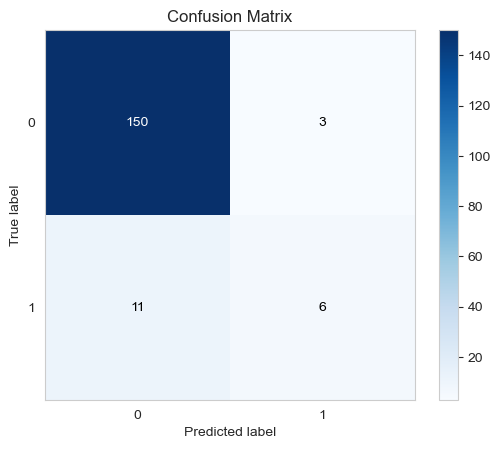

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       153
           1       0.67      0.35      0.46        17

    accuracy                           0.92       170
   macro avg       0.80      0.67      0.71       170
weighted avg       0.91      0.92      0.91       170



In [68]:
# example of cost sensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat)

# Cost Sensitive Learning Using class_weight='balanced'

In [69]:
cs_precision, cs_recall, cs_f05, names = compareCostSensitiveAlgorithms(X_train, y_train, 'balanced')

cost_sensitive_balanced_precision.png


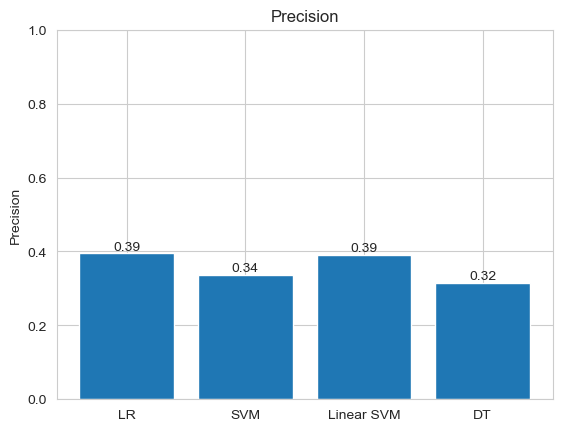

cost_sensitive_balanced_recall.png


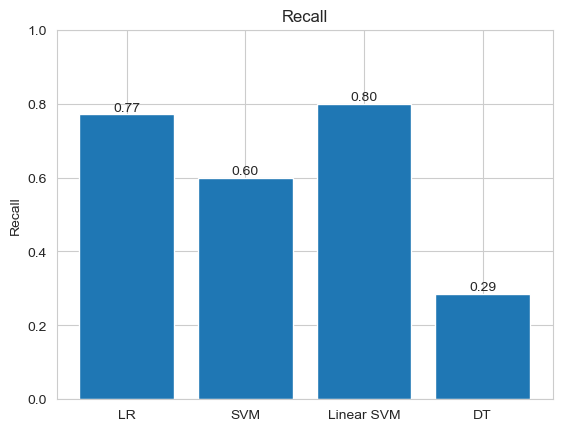

cost_sensitive_balanced_f05.png


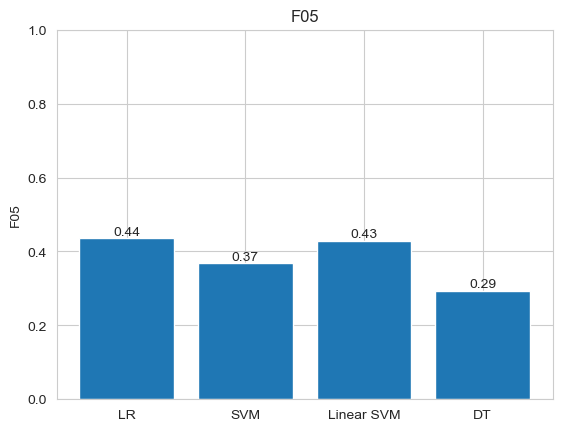

In [109]:
barChart(cs_precision, "Precision", "cost_sensitive_balanced_precision")
barChart(cs_recall, "Recall", "cost_sensitive_balanced_recall")
barChart(cs_f05, "F05", "cost_sensitive_balanced_f05")

F0.5: 0.448
Recall: 0.765
Precision: 0.406


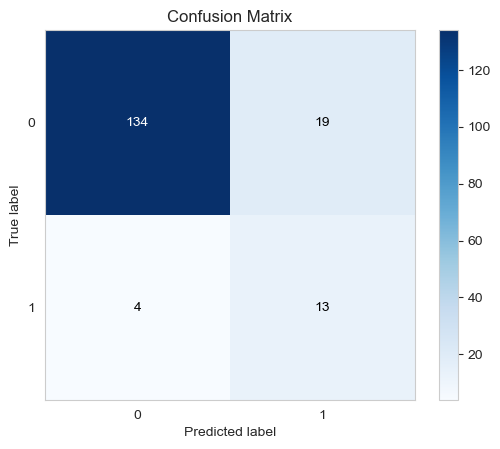

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       153
           1       0.41      0.76      0.53        17

    accuracy                           0.86       170
   macro avg       0.69      0.82      0.73       170
weighted avg       0.91      0.86      0.88       170



In [71]:
# define model
model = LogisticRegression(solver='liblinear',class_weight='balanced' )
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat)

cost_senstive_vs_insensitive_recall.png


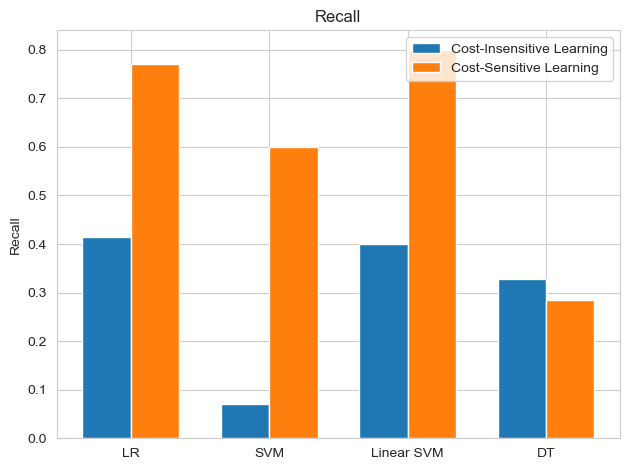

cost_senstive_vs_insensitive_precision.png


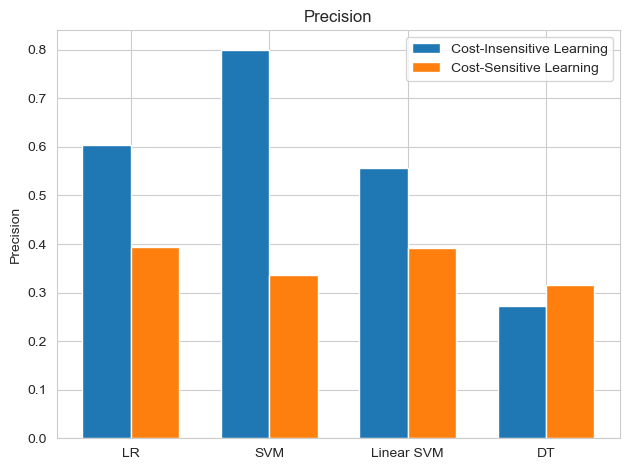

cost_senstive_vs_insensitive_f05.png


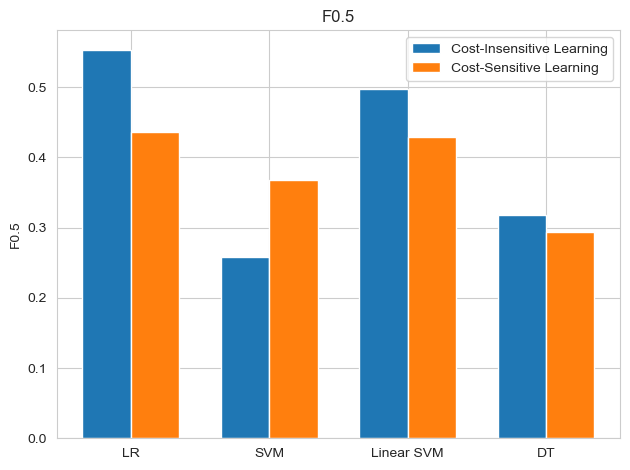

In [72]:
# plot cost sensitive vs. insensitive learning
twoGroupsBarChart(recall, "Cost-Insensitive Learning", cs_recall,
                  "Cost-Sensitive Learning", "Recall", "cost_senstive_vs_insensitive_recall")
twoGroupsBarChart(precision, "Cost-Insensitive Learning", cs_precision,
                  "Cost-Sensitive Learning", "Precision", "cost_senstive_vs_insensitive_precision")
twoGroupsBarChart(f05, "Cost-Insensitive Learning", cs_f05,
                  "Cost-Sensitive Learning", "F0.5", "cost_senstive_vs_insensitive_f05")

# Compare Cost Sensitive Learning with Data Resampling

In [73]:
sm_precision, sm_recall, sm_f05, names = compareAlgorithmsSMOTE(X_train, y_train)
rus_precision, rus_recall, rus_f05, names = compareAlgorithmsRUS(X_train, y_train)


cost_senstive_vs_resampling_precision.png


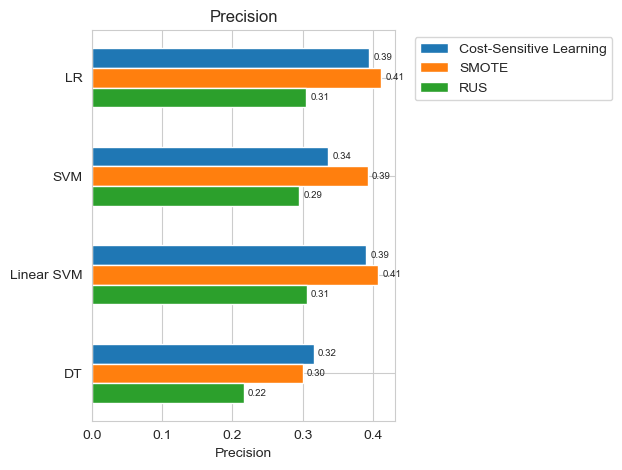

cost_senstive_vs_resampling_recall.png


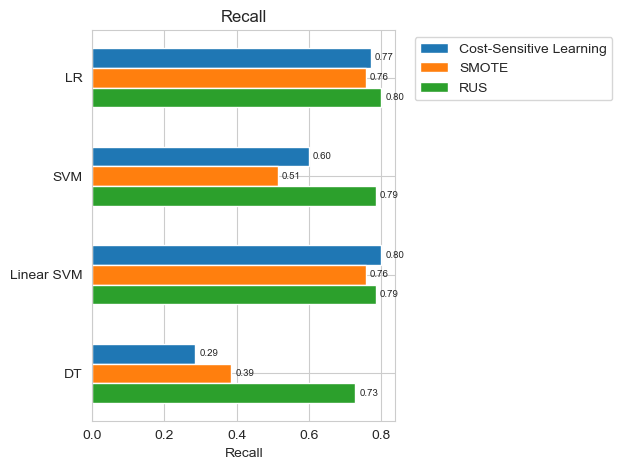

cost_senstive_vs_resampling_f05.png


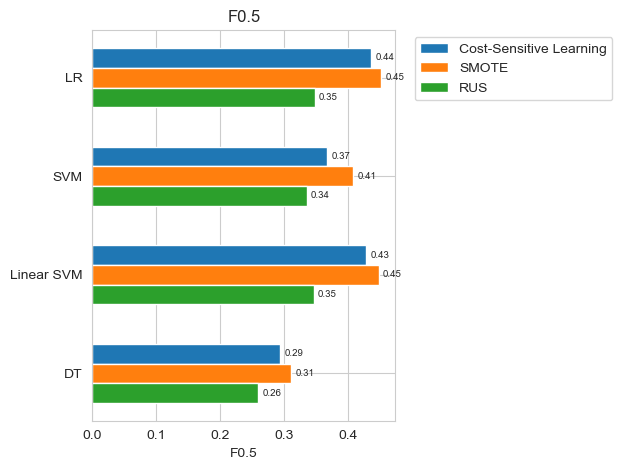

In [74]:
# compare Cost sensitive with SMOTE and RUS

threeGroupsBarChart(cs_precision, "Cost-Sensitive Learning",
                    sm_precision, "SMOTE",
                    rus_precision, "RUS",
                    "Precision" , "cost_senstive_vs_resampling_precision")

threeGroupsBarChart(cs_recall, "Cost-Sensitive Learning",
                    sm_recall, "SMOTE", 
                    rus_recall, "RUS",
                    "Recall", "cost_senstive_vs_resampling_recall")

threeGroupsBarChart(cs_f05, "Cost-Sensitive Learning",
                    sm_f05, "SMOTE", 
                    rus_f05, "RUS",
                    "F0.5", "cost_senstive_vs_resampling_f05")

# Find Optimal Class Weights Using Grid Search

## LR

In [75]:
def plotGridSearchOptimalWeight(gridSearch_model, title, name):
    
    #Ploting the score for different values of weight
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,8))
    weigh_data = pd.DataFrame({ 'score': gridSearch_model.cv_results_['mean_test_score'], 'weight': (1- weights)})
    sns.lineplot(weigh_data['weight'], weigh_data['score'])
    plt.xlabel('Weight for class 1')
    plt.ylabel('F0.5 score')
    plt.xticks([round(i/10,1) for i in range(0,11,1)])
    plt.title(title, fontsize=24)
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/costSensitive/' + fileName)

In [76]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(max_iter=5000)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_lr = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.1s
[CV] END class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}; total time=   0.0s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.0s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.0s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.0s
[CV] END class_weight={0: 0.019899497487437186, 1: 0.9801005025125629}; total time=   0.0s
[CV] END class_weight={0: 0.024874371859296484, 1: 0.9751256281407035}; total time=   0.0s
[CV] END class_weight={0: 0.029849246231155778, 1: 0.9701507537688442}; total time=   0.1s
[CV] END class_weight={0: 0.034824120603015075, 1: 0.9651758793969849}; total time=   0.1s
[CV] END class_weight={0: 0.03979899497487437, 1: 0.9602010050251256}; total time=   0.0s
[CV] END class_weight={0: 0.039798994

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

gridSearch_optimalWeights_lr.png


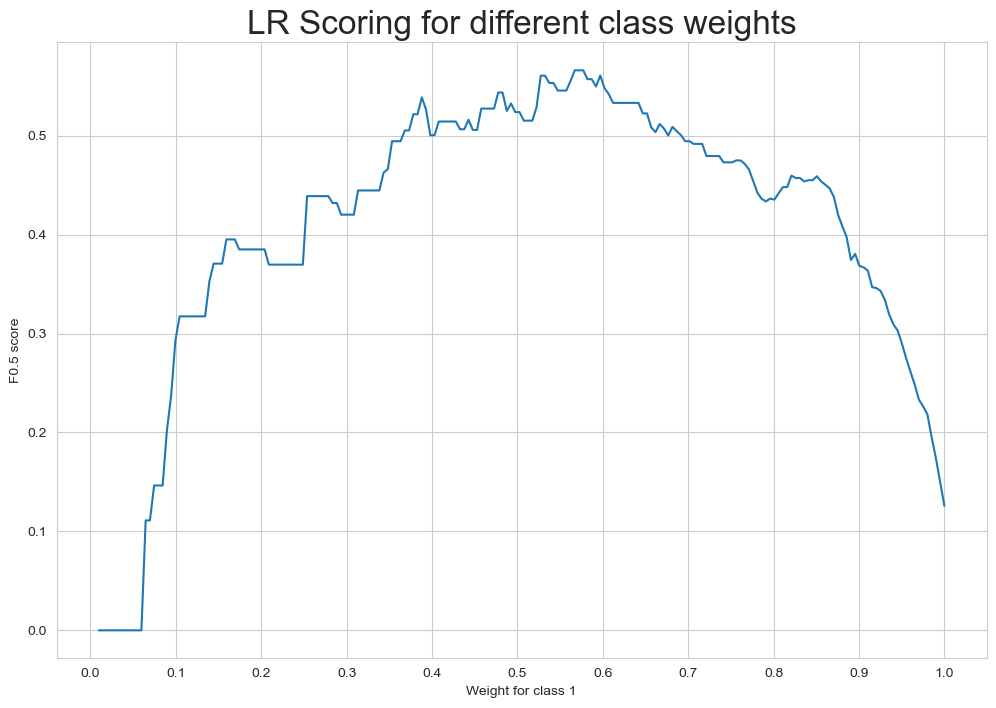

In [77]:
plotGridSearchOptimalWeight(gridsearch_lr, 'LR Scoring for different class weights', "gridSearch_optimalWeights_lr")

In [78]:
gridsearch_lr.best_params_

{'class_weight': {0: 0.4228643216080402, 1: 0.5771356783919598}}

In [79]:
optimal_weights = {0: 0.23381909547738694, 1:0.7661809045226131 }
optimal_weights

{0: 0.23381909547738694, 1: 0.7661809045226131}

F-Measure: 0.414
Recall: 0.824
Precision: 0.368


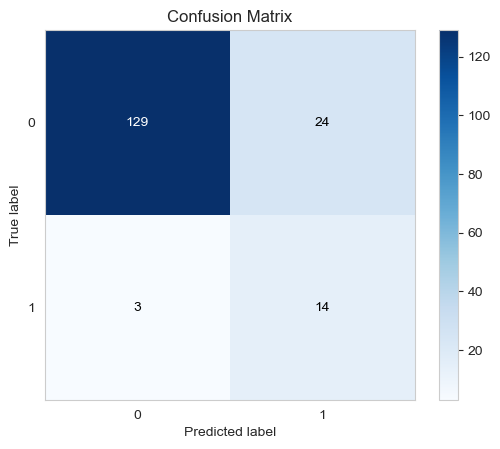

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       153
           1       0.37      0.82      0.51        17

    accuracy                           0.84       170
   macro avg       0.67      0.83      0.71       170
weighted avg       0.92      0.84      0.87       170



In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.5389, 1: 6.915})
lr.fit(X_train, y_train)

# Predicting on the test data
yhat = lr.predict(X_test)

#Calculating and printing the f0.5 score 
print('F-Measure: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat)

## SVC

In [81]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = SVC()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_svc = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

[CV] END class_weight={0: 0.36814070351758793, 1: 0.6318592964824121}; total time=   0.1s
[CV] END class_weight={0: 0.37809045226130655, 1: 0.6219095477386934}; total time=   0.1s
[CV] END class_weight={0: 0.38306532663316584, 1: 0.6169346733668342}; total time=   0.1s
[CV] END class_weight={0: 0.38306532663316584, 1: 0.6169346733668342}; total time=   0.1s
[CV] END class_weight={0: 0.38306532663316584, 1: 0.6169346733668342}; total time=   0.1s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.1s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.2s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.2s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.1s
[CV] END class_weight={0: 0.4129145728643216, 1: 0.5870854271356785}; total time=   0.1s
[CV] END class_weight={0: 0.41291457

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple


[CV] END class_weight={0: 0.10447236180904523, 1: 0.8955276381909547}; total time=   0.1s
[CV] END class_weight={0: 0.10447236180904523, 1: 0.8955276381909547}; total time=   0.1s
[CV] END class_weight={0: 0.10944723618090453, 1: 0.8905527638190954}; total time=   0.1s
[CV] END class_weight={0: 0.11442211055276383, 1: 0.8855778894472361}; total time=   0.1s
[CV] END class_weight={0: 0.11939698492462311, 1: 0.8806030150753769}; total time=   0.1s
[CV] END class_weight={0: 0.11939698492462311, 1: 0.8806030150753769}; total time=   0.1s
[CV] END class_weight={0: 0.1293467336683417, 1: 0.8706532663316583}; total time=   0.1s
[CV] END class_weight={0: 0.1293467336683417, 1: 0.8706532663316583}; total time=   0.1s
[CV] END class_weight={0: 0.13432160804020102, 1: 0.865678391959799}; total time=   0.1s
[CV] END class_weight={0: 0.13432160804020102, 1: 0.865678391959799}; total time=   0.1s
[CV] END class_weight={0: 0.1442713567839196, 1: 0.8557286432160804}; total time=   0.1s
[CV] END class

gridSearch_optimalWeights_svc.png


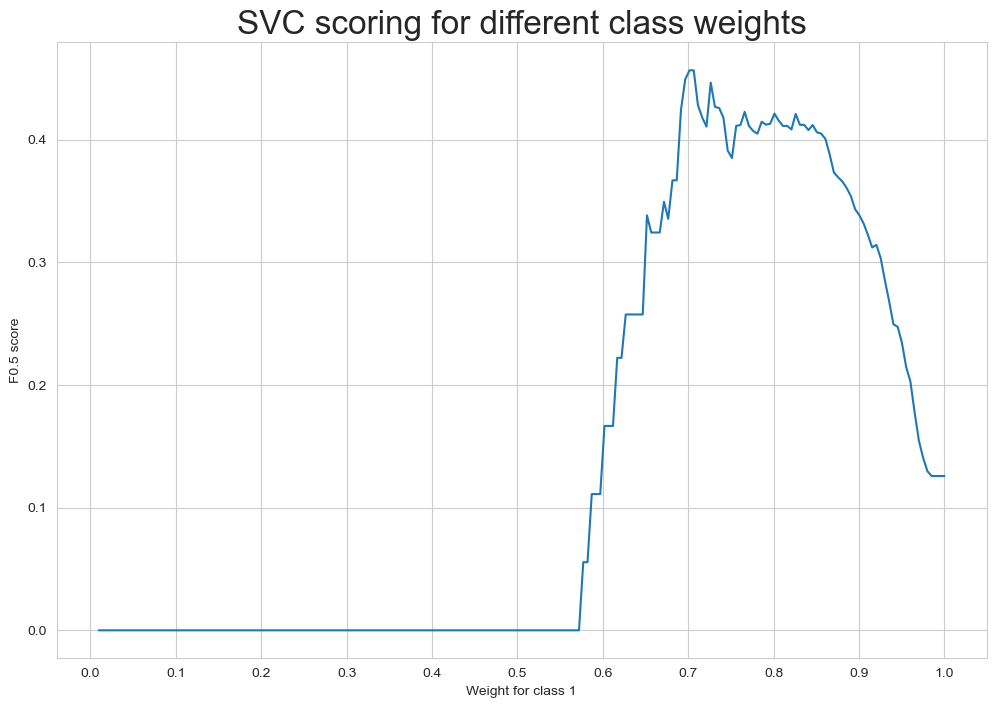

In [82]:
plotGridSearchOptimalWeight(gridsearch_svc, 'SVC scoring for different class weights', "gridSearch_optimalWeights_svc")

## Linear SVC

In [83]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = LinearSVC()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_linsvc = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

[CV] END class_weight={0: 0.4676381909547739, 1: 0.5323618090452261}; total time=   0.0s
[CV] END class_weight={0: 0.4676381909547739, 1: 0.5323618090452261}; total time=   0.0s
[CV] END class_weight={0: 0.47261306532663316, 1: 0.5273869346733668}; total time=   0.0s
[CV] END class_weight={0: 0.47261306532663316, 1: 0.5273869346733668}; total time=   0.1s
[CV] END class_weight={0: 0.4825628140703518, 1: 0.5174371859296483}; total time=   0.1s
[CV] END class_weight={0: 0.4825628140703518, 1: 0.5174371859296483}; total time=   0.0s
[CV] END class_weight={0: 0.48753768844221107, 1: 0.5124623115577889}; total time=   0.0s
[CV] END class_weight={0: 0.49251256281407035, 1: 0.5074874371859297}; total time=   0.0s
[CV] END class_weight={0: 0.49748743718592964, 1: 0.5025125628140703}; total time=   0.1s
[CV] END class_weight={0: 0.49748743718592964, 1: 0.5025125628140703}; total time=   0.1s
[CV] END class_weight={0: 0.50743718592

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple


[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=   0.1s
[CV] END class_weight={0: 0.8308040201005026, 1: 0.16919597989949742}; total time=   0.1s
[CV] END class_weight={0: 0.8357788944723619, 1: 0.16422110552763813}; total time=   0.1s
[CV] END class_weight={0: 0.8357788944723619, 1: 0.16422110552763813}; total time=   0.2s
[CV] END class_weight={0: 0.8457286432160804, 1: 0.15427135678391957}; total time=   0.3s
[CV] END class_weight={0: 0.8457286432160804, 1: 0.15427135678391957}; total time=   0.1s
[CV] END class_weight={0: 0.8507035175879397, 1: 0.14929648241206028}; total time=   0.1s
[CV] END class_weight={0: 0.8507035175879397, 1: 0.14929648241206028}; total time=   0.1s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.1s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.1s
[CV] END class_weight={0: 0.8656281407035176, 1: 0.13437185929648243}; total time=   0.1s
[CV] END class_w

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/vali


[CV] END class_weight={0: 0.19899497487437187, 1: 0.8010050251256281}; total time=   0.1s
[CV] END class_weight={0: 0.19899497487437187, 1: 0.8010050251256281}; total time=   0.1s
[CV] END class_weight={0: 0.20396984924623116, 1: 0.7960301507537688}; total time=   0.2s
[CV] END class_weight={0: 0.20396984924623116, 1: 0.7960301507537688}; total time=   0.1s
[CV] END class_weight={0: 0.21391959798994975, 1: 0.7860804020100502}; total time=   0.1s
[CV] END class_weight={0: 0.21391959798994975, 1: 0.7860804020100502}; total time=   0.2s
[CV] END class_weight={0: 0.21889447236180906, 1: 0.781105527638191}; total time=   0.1s
[CV] END class_weight={0: 0.21889447236180906, 1: 0.781105527638191}; total time=   0.1s
[CV] END class_weight={0: 0.22884422110552766, 1: 0.7711557788944723}; total time=   0.1s
[CV] END class_weight={0: 0.22884422110552766, 1: 0.7711557788944723}; total time=   0.1s
[CV] END class_weight={0: 0.23879396984924622, 1: 0.7612060301507537}; total time=   0.1s
[CV] END cl

gridSearch_optimalWeights_linsvc.png


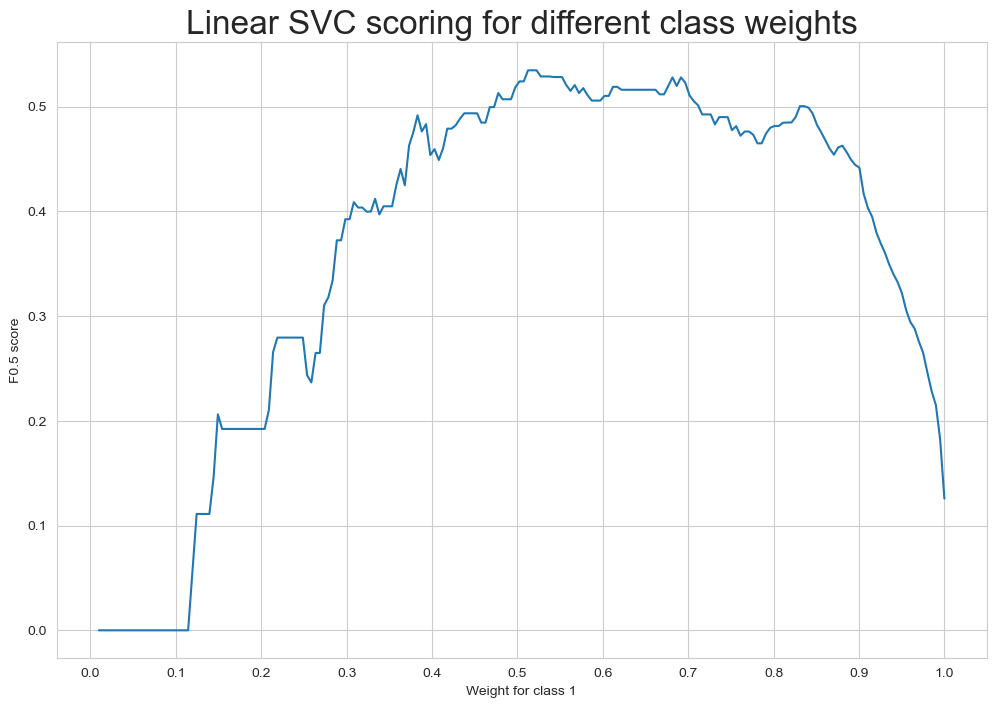

In [84]:
plotGridSearchOptimalWeight(gridsearch_linsvc, 'Linear SVC scoring for different class weights', "gridSearch_optimalWeights_linsvc")

## DT

In [85]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = DecisionTreeClassifier()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_dt = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits

[CV] END class_weight={0: 0.5621608040201005, 1: 0.4378391959798995}; total time=   0.1s
[CV] END class_weight={0: 0.5621608040201005, 1: 0.4378391959798995}; total time=   0.1s
[CV] END class_weight={0: 0.5721105527638191, 1: 0.42788944723618094}; total time=   0.2s
[CV] END class_weight={0: 0.5721105527638191, 1: 0.42788944723618094}; total time=   0.1s
[CV] END class_weight={0: 0.5770854271356785, 1: 0.42291457286432155}; total time=   0.1s
[CV] END class_weight={0: 0.5820603015075377, 1: 0.41793969849246226}; total time=   0.1s
[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=   0.1s
[CV] END class_weight={0: 0.587035175879397, 1: 0.412964824120603}; total time=   0.1s
[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=   0.1s
[CV] END class_weight={0: 0.5969849246231156, 1: 0.4030150753768844}; total time=   0.1s
[CV] END class_weight={0: 0.6019597989949749,

gridSearch_optimalWeights_dt.png


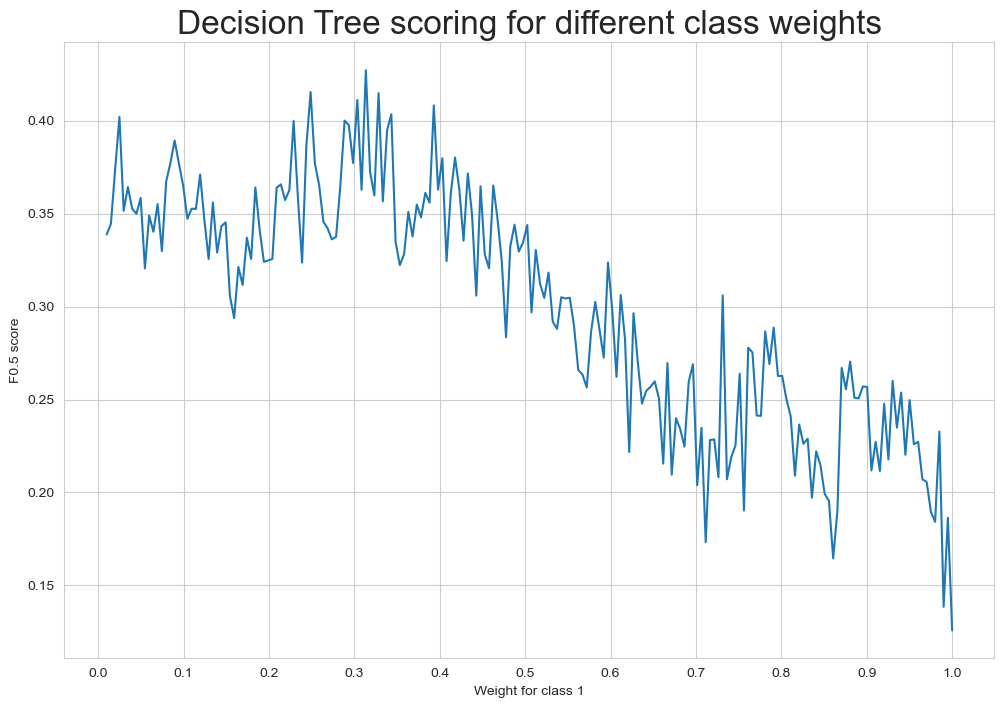

In [86]:
plotGridSearchOptimalWeight(gridsearch_dt, 'Decision Tree scoring for different class weights', "gridSearch_optimalWeights_dt")

In [87]:
gridsearch_lr.best_params_

{'class_weight': {0: 0.4228643216080402, 1: 0.5771356783919598}}

In [88]:
gridsearch_svc.best_params_

{'class_weight': {0: 0.2935175879396985, 1: 0.7064824120603015}}

In [89]:
gridsearch_linsvc.best_params_

{'class_weight': {0: 0.47758793969849245, 1: 0.5224120603015076}}

In [90]:
gridsearch_dt.best_params_

{'class_weight': {0: 0.6865326633165829, 1: 0.3134673366834171}}

In [91]:
def compareCostSensitiveAlgorithmsWithOptimalWeights(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(class_weight={0:0.4228643216080402 , 1:0.5771356783919598 })))
    models.append(('SVM', SVC(class_weight={0:0.2935175879396985 , 1: 0.7064824120603015})))
    models.append(('Linear SVC', LinearSVC(class_weight={0:0.452713567839196 , 1: 0.547286432160804})))
    models.append(('DT', DecisionTreeClassifier(class_weight={0:0.6566834170854271 , 1:0.3433165829145729 })))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [92]:
cs2_precision, cs2_recall, cs2_f05, names = compareCostSensitiveAlgorithmsWithOptimalWeights(X_train, y_train)

cost_sensitive_tuned_precision.png


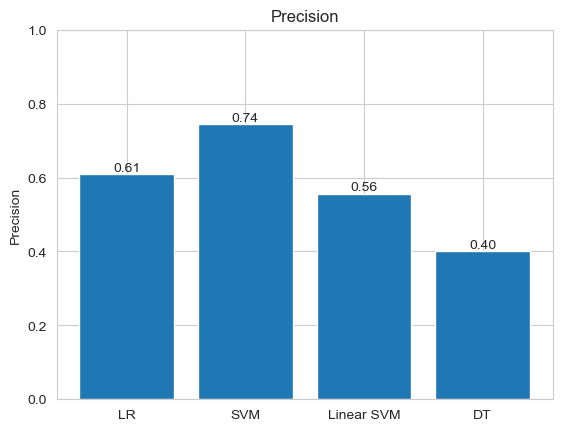

cost_sensitive_tuned_recall.png


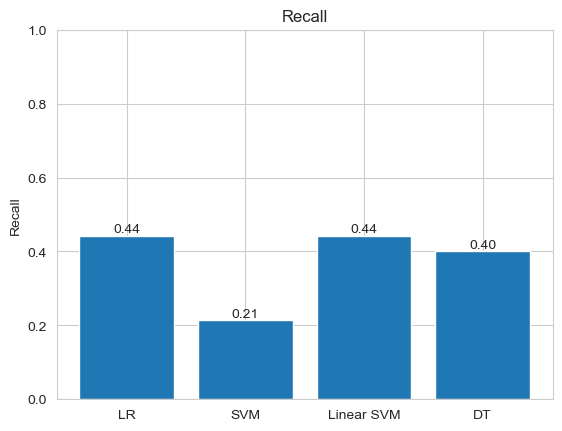

cost_sensitive_tuned_f05.png


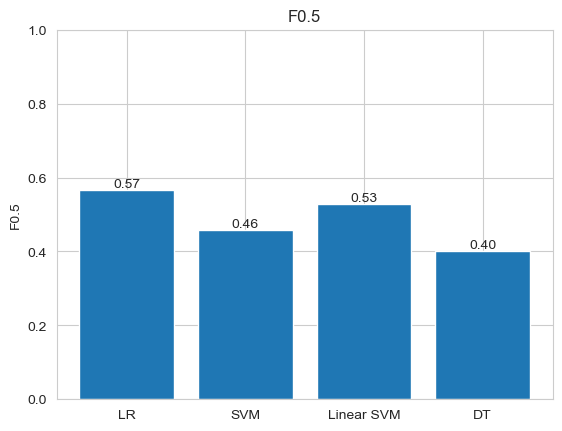

In [110]:
barChart(cs2_precision, "Precision", "cost_sensitive_tuned_precision")
barChart(cs2_recall, "Recall", "cost_sensitive_tuned_recall")
barChart(cs2_f05, "F0.5", "cost_sensitive_tuned_f05")

cost_sensitive_balanced_vs_optimal_precision.png


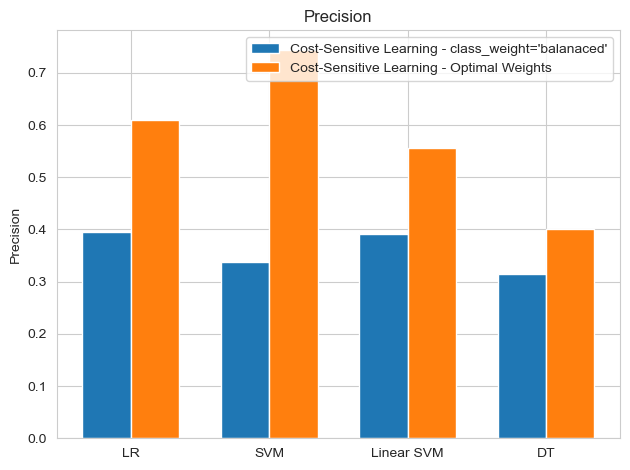

cost_sensitive_balanced_vs_optimal_recall.png


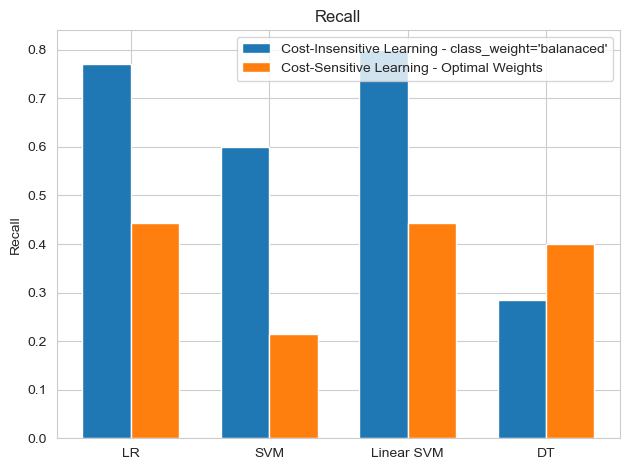

cost_sensitive_balanced_vs_optimal_f05.png


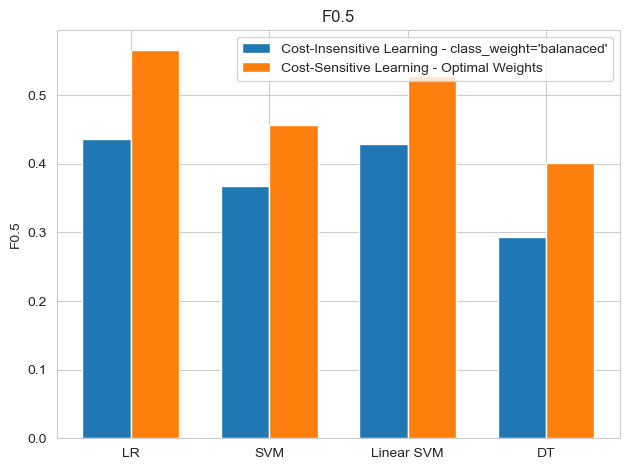

In [93]:
# plot cost sensitive with Optimal Weights vs. sensitive learning with class_weight='balanced'

twoGroupsBarChart(cs_precision, "Cost-Sensitive Learning - class_weight='balanaced'",
                 cs2_precision, "Cost-Sensitive Learning - Optimal Weights", "Precision",
                 "cost_sensitive_balanced_vs_optimal_precision")
twoGroupsBarChart(cs_recall, "Cost-Insensitive Learning - class_weight='balanaced'",
                 cs2_recall, "Cost-Sensitive Learning - Optimal Weights", "Recall",
                 "cost_sensitive_balanced_vs_optimal_recall")
twoGroupsBarChart(cs_f05, "Cost-Insensitive Learning - class_weight='balanaced'",
                 cs2_f05, "Cost-Sensitive Learning - Optimal Weights", "F0.5",
                 "cost_sensitive_balanced_vs_optimal_f05")

cost_sensitive_optimal_vs_insensitive_precision.png


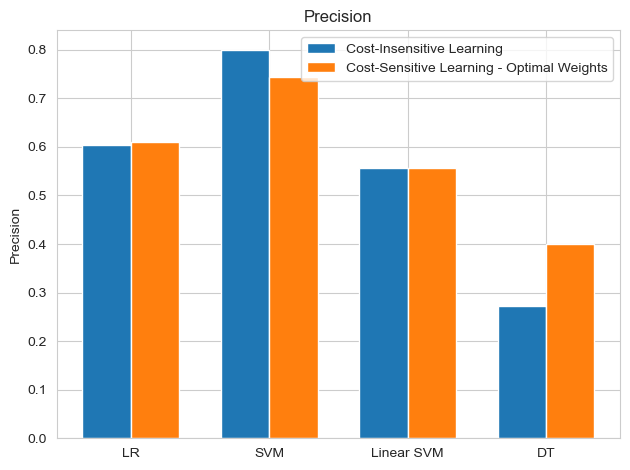

cost_sensitive_optimal_vs_insensitive_recall.png


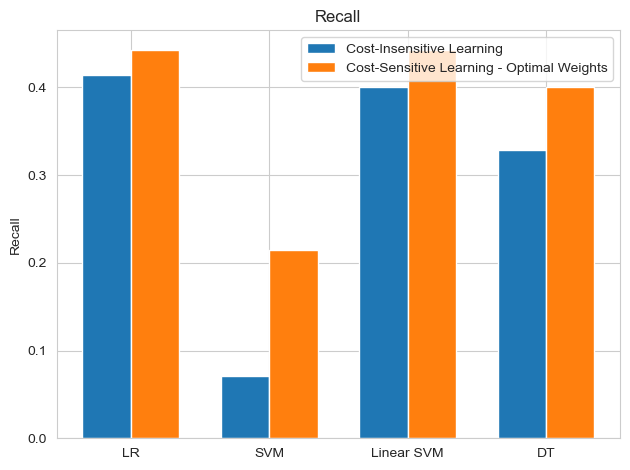

cost_sensitive_optimal_vs_insensitive_f05.png


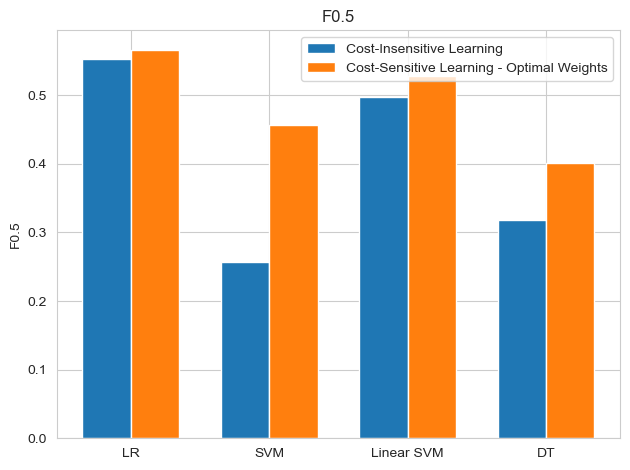

In [94]:
# plot cost sensitive with Optimal Weights vs. insensitive learning
twoGroupsBarChart(precision, "Cost-Insensitive Learning", cs2_precision, "Cost-Sensitive Learning - Optimal Weights", "Precision",
                 "cost_sensitive_optimal_vs_insensitive_precision")
twoGroupsBarChart(recall, "Cost-Insensitive Learning", cs2_recall, "Cost-Sensitive Learning - Optimal Weights", "Recall",
                 "cost_sensitive_optimal_vs_insensitive_recall")
twoGroupsBarChart(f05, "Cost-Insensitive Learning", cs2_f05, "Cost-Sensitive Learning - Optimal Weights", "F0.5",
                 "cost_sensitive_optimal_vs_insensitive_f05")

cost_sensitive_optimal_vs_resampling_precision.png


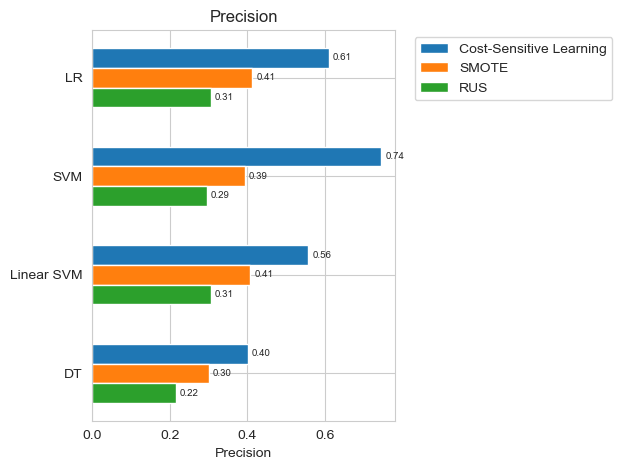

cost_sensitive_optimal_vs_resampling_recall.png


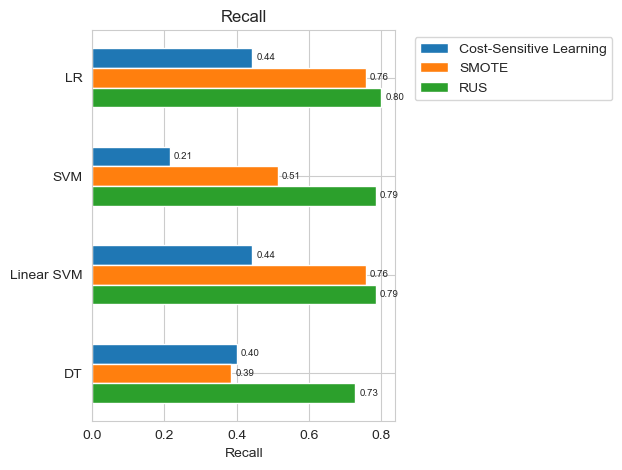

cost_sensitive_optimal_vs_resampling_f05.png


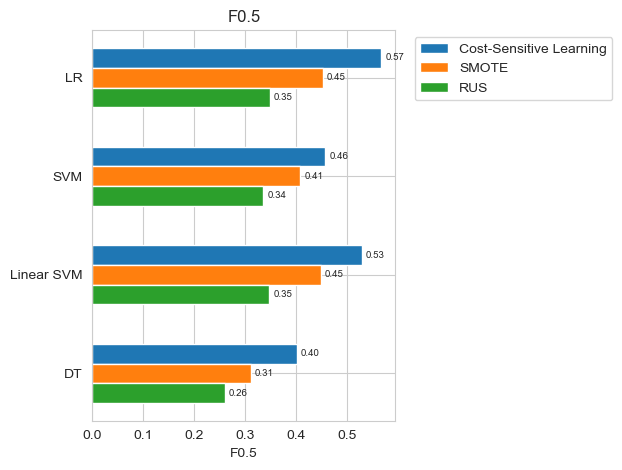

In [95]:
# plot cost sensitive with Optimal Weights vs. SMOTE and RUS

threeGroupsBarChart(cs2_precision, "Cost-Sensitive Learning",
                    sm_precision, "SMOTE",
                    rus_precision, "RUS",
                    "Precision", "cost_sensitive_optimal_vs_resampling_precision")

threeGroupsBarChart(cs2_recall, "Cost-Sensitive Learning",
                    sm_recall, "SMOTE", 
                    rus_recall, "RUS",
                    "Recall", "cost_sensitive_optimal_vs_resampling_recall")

threeGroupsBarChart(cs2_f05, "Cost-Sensitive Learning",
                    sm_f05, "SMOTE", 
                    rus_f05, "RUS",
                    "F0.5", "cost_sensitive_optimal_vs_resampling_f05")

precision_baseline_vs_cost_sensitive_balanced_vs_optimal.png


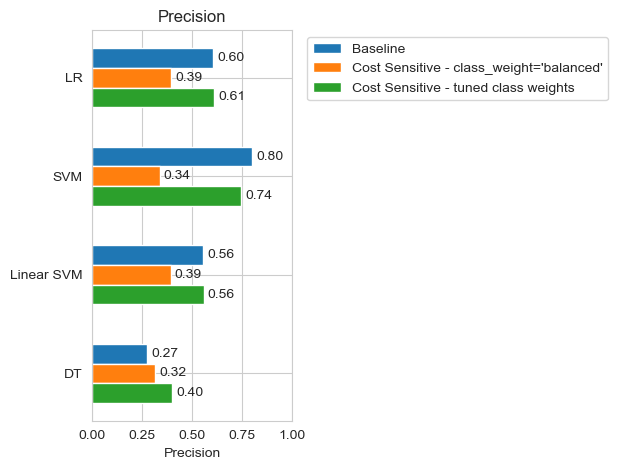

recall_baseline_vs_cost_sensitive_balanced_vs_optimal.png


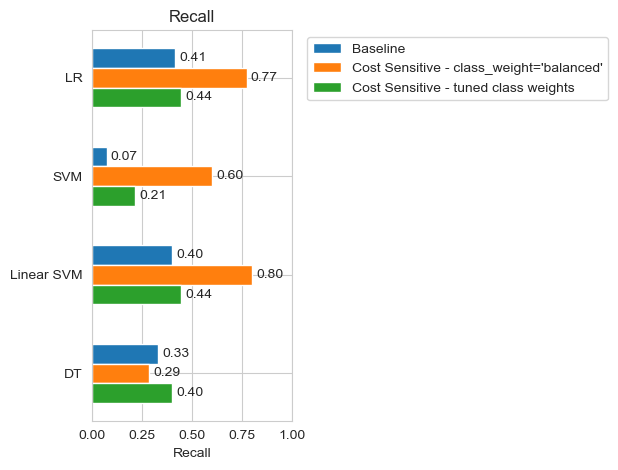

f05_baseline_vs_cost_sensitive_balanced_vs_optimal.png


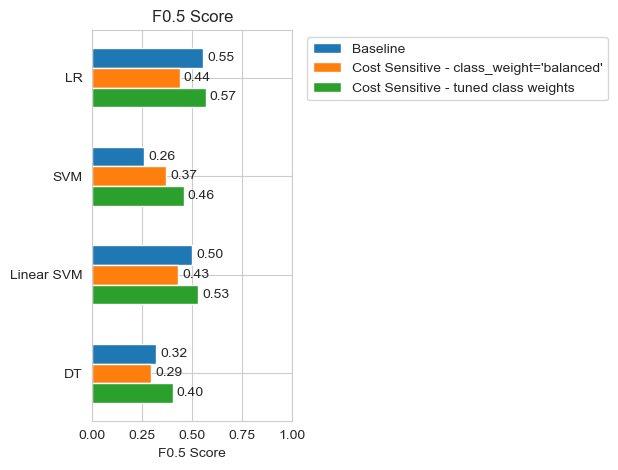

In [102]:
# plot baseline vs cost-sensitive balanced vs cost-sensitive optimal

threeGroupsBarChart(precision, "Baseline",
                    cs_precision, "Cost Sensitive - class_weight='balanced'",
                    cs2_precision, "Cost Sensitive - tuned class weights",
                    "Precision", "precision_baseline_vs_cost_sensitive_balanced_vs_optimal")

threeGroupsBarChart(recall, "Baseline",
                    cs_recall, "Cost Sensitive - class_weight='balanced'",
                    cs2_recall, "Cost Sensitive - tuned class weights",
                    "Recall", "recall_baseline_vs_cost_sensitive_balanced_vs_optimal")

threeGroupsBarChart(f05, "Baseline",
                    cs_f05, "Cost Sensitive - class_weight='balanced'",
                    cs2_f05, "Cost Sensitive - tuned class weights",
                    "F0.5 Score", "f05_baseline_vs_cost_sensitive_balanced_vs_optimal")